# Import Required Libraries
Import the necessary libraries, including pandas, numpy, matplotlib, seaborn, and sklearn.

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the Dataset
Load the wine quality dataset using pandas.

In [72]:
# Load the wine quality dataset using pandas
df = pd.read_csv('winequalityN.csv')

# Display the first few rows of the dataset
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# Preprocess the Data
Handle missing values, encode categorical variables, and split the data into features and target.

In [73]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Handle missing values (if any)
df = df.dropna()

# Encode categorical variables (if any)
# Assuming 'quality' is the target variable and is categorical
df['quality'] = df['quality'].astype('category').cat.codes

# Encode 'white' and 'red' values if the column exists
if 'type' in df.columns:
	df['type'] = df['type'].map({'white': 0, 'red': 1})

# Split the data into features and target
X = df.drop('quality', axis=1)
y = df['quality']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Missing values in each column:
 type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64


# Standardize the Data
Standardize the features using StandardScaler from sklearn.

In [74]:
# Standardize the Data

from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
Apply PCA using PCA from sklearn and transform the standardized data.

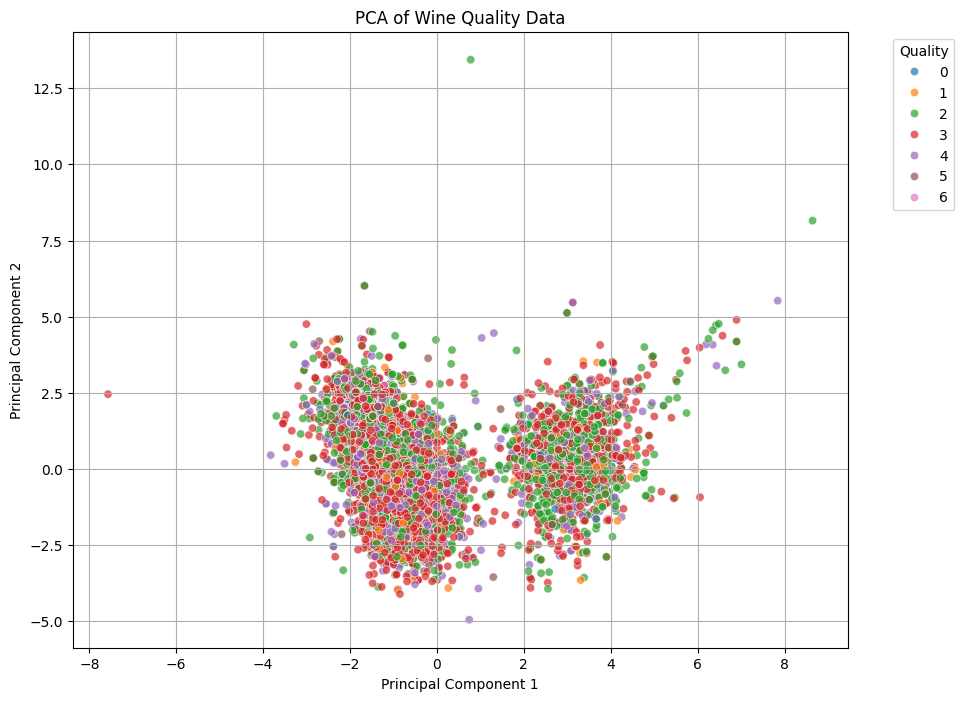

In [75]:
# Apply PCA
pca = PCA(n_components=2)
pca_df = pca.fit_transform(X_scaled)

# Create a DataFrame with the PCA components
pca_df = pd.DataFrame(data=pca_df, columns=['Principal Component 1', 'Principal Component 2'])

# Add PCA components to the original DataFrame
df['PCA_1'] = pca_df['Principal Component 1']
df['PCA_2'] = pca_df['Principal Component 2']

# Plot the PCA components
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA_1', y='PCA_2', hue=y, data=df, palette='tab10', alpha=0.7)
plt.title('PCA of Wine Quality Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Quality', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [76]:
PCA1_abs = [abs(number) for number in pca.components_[0]]

PCA1 = pd.DataFrame({
    'feature_names': X.columns,
    'PCA': pca.components_[0],
    'PCA_abs': PCA1_abs,
})

sorted_df1 = PCA1.sort_values(by='PCA_abs', ascending=False)


In [77]:
PCA2_abs = [abs(number) for number in pca.components_[1]]
PCA2 = pd.DataFrame({
    'Feature Names': X.columns,
    'PCA': pca.components_[1],
    'PCA_abs': PCA2_abs,
})

# Sorting the DataFrame to show most influential features for PCA2
sorted_df2 = PCA2.sort_values(by='PCA_abs', ascending=False)

print("Top Influential Questions for PCA1:")
print(sorted_df1.head())

print("Top Influential Questions for PCA2:")
print(sorted_df2.head())

Top Influential Questions for PCA1:
          feature_names       PCA   PCA_abs
0                  type  0.470635  0.470635
7  total sulfur dioxide -0.412535  0.412535
2      volatile acidity  0.358881  0.358881
6   free sulfur dioxide -0.345285  0.345285
5             chlorides  0.295828  0.295828
Top Influential Questions for PCA2:
     Feature Names       PCA   PCA_abs
8          density  0.560755  0.560755
11         alcohol -0.476436  0.476436
4   residual sugar  0.398692  0.398692
1    fixed acidity  0.271055  0.271055
5        chlorides  0.240175  0.240175


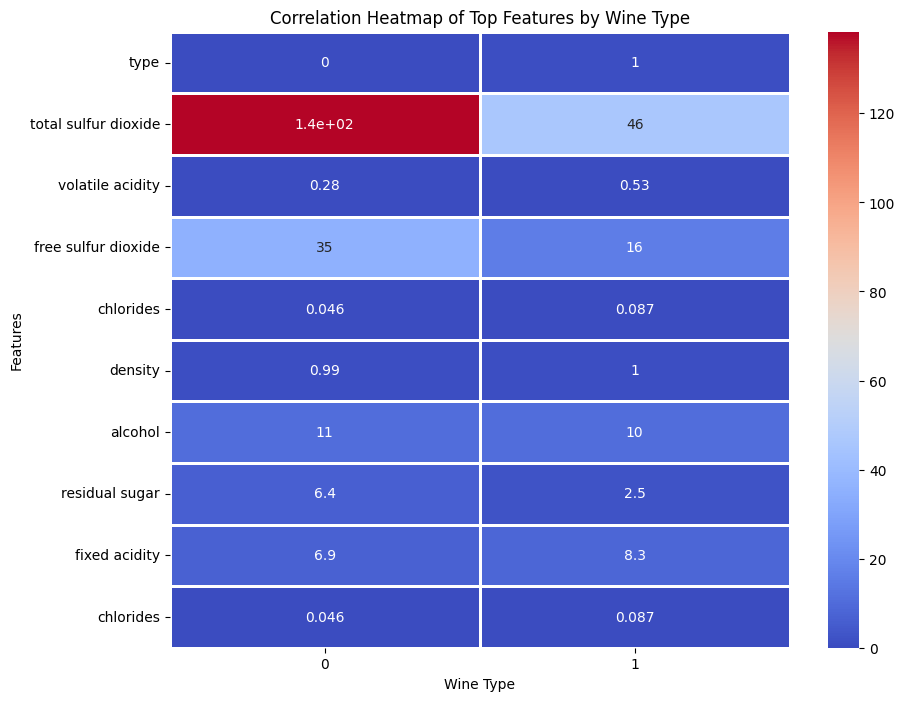

In [78]:

important_features = ['type', 'total sulfur dioxide', 'volatile acidity', 'free sulfur dioxide', 'chlorides',
                      'density', 'alcohol', 'residual sugar', 'fixed acidity', 'chlorides']

# Group by type of wine
grouped_df = df.groupby('type')[important_features].mean()

# Plot the distribution of wine types on the top features
plt.figure(figsize=(10, 8))
sns.heatmap(grouped_df.T, cmap='coolwarm', annot=True, linecolor='white', linewidth=1)
plt.title('Correlation Heatmap of Top Features by Wine Type')
plt.xlabel('Wine Type')
plt.ylabel('Features')
plt.show()

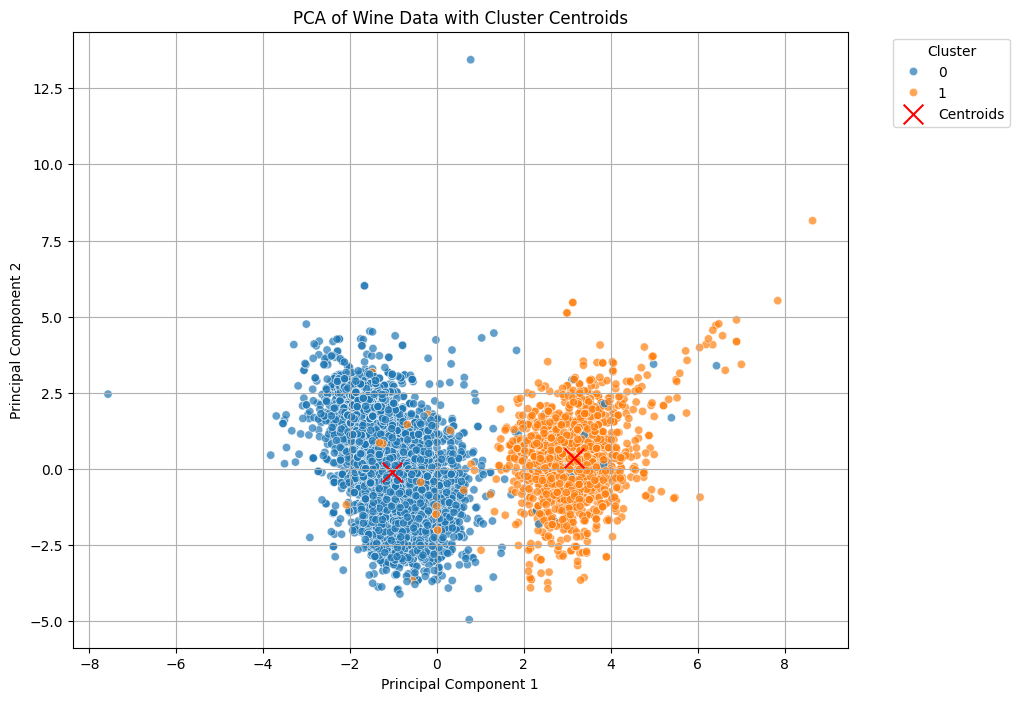

In [79]:
#A clustering analysis where you attempt various cluster numbers, which would correspond to different parties. Discuss whether there is room for more clusters/parties or if a reduction is needed. 
#Kmeans
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)
df['Cluster'] = kmeans.labels_

centroids = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA_1', y='PCA_2', hue='Cluster', data=df, palette='tab10', alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='x', label='Centroids')
plt.title('PCA of Wine Data with Cluster Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

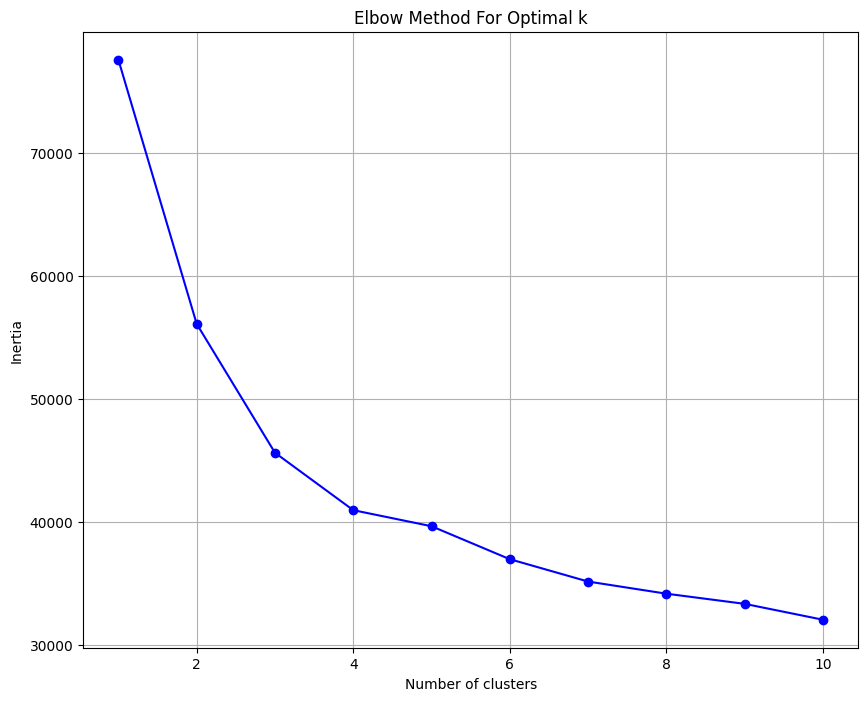

In [80]:
from sklearn.cluster import KMeans

# Elbow Analysis for KMeans Clustering
import matplotlib.pyplot as plt

# Calculate the within-cluster sum of squares (inertia) for different number of clusters
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 8))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

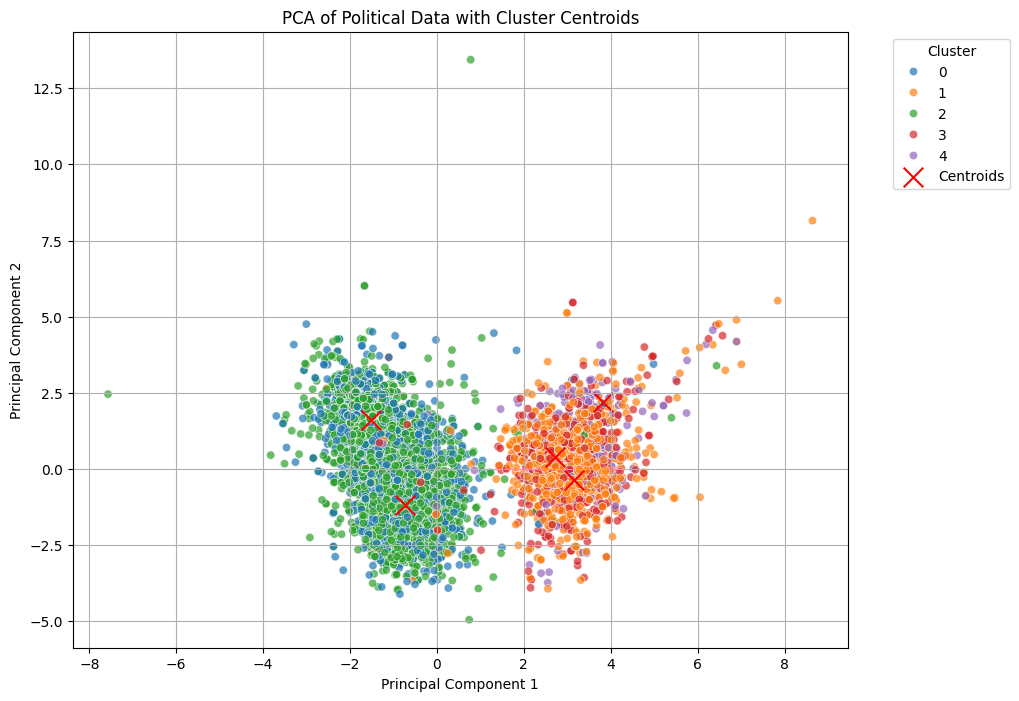

In [81]:
#on the elblow method we can deem the optimal number of clusters to be aroud 8
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)
df['Cluster'] = kmeans.labels_

# Transformer centroids to PCA space
centroids = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA_1', y='PCA_2', hue='Cluster', data=df, palette='tab10', alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='x', label='Centroids')
plt.title('PCA of Political Data with Cluster Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [45.0, 45.0, 55.0, 55.0],
  [22.5, 22.5, 50.0, 50.0],
  [5.0, 5.0, 36.25, 36.25],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [95.0, 95.0, 105.0, 105.0],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [125.0, 125.0, 142.5, 142.5],
  [115.0, 115.0, 133.75, 133.75],
  [100.0, 100.0, 124.375, 124.375],
  [72.5, 72.5, 112.1875, 112.1875],
  [20.625, 20.625, 92.34375, 92.34375],
  [165.0, 165.0, 175.0, 175.0],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [170.0, 170.0, 192.5, 192.5],
  [215.0, 215.0, 225.0, 225.0],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [265.0, 265.0, 275.0, 275.0],
  [242.5, 242.5, 270.0, 270.0],
  [220.0, 220.0, 256.25, 256.25],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [315.0, 315.0, 325.0, 325.0],
  [345.0, 345.0, 355.0, 355.0],
  [335.0, 335.0, 350.0, 350.0],
  [320.0, 320.0, 342.5, 342.5],
  [292.5

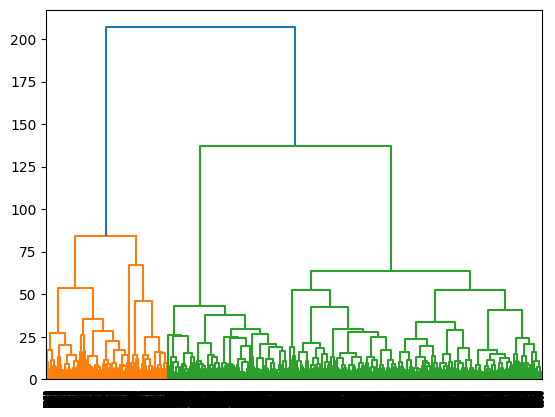

In [82]:
from scipy.cluster.hierarchy import dendrogram, ward
linkage_array = ward(X_scaled) #ward is a method for hierarchical clustering
dendrogram(linkage_array)

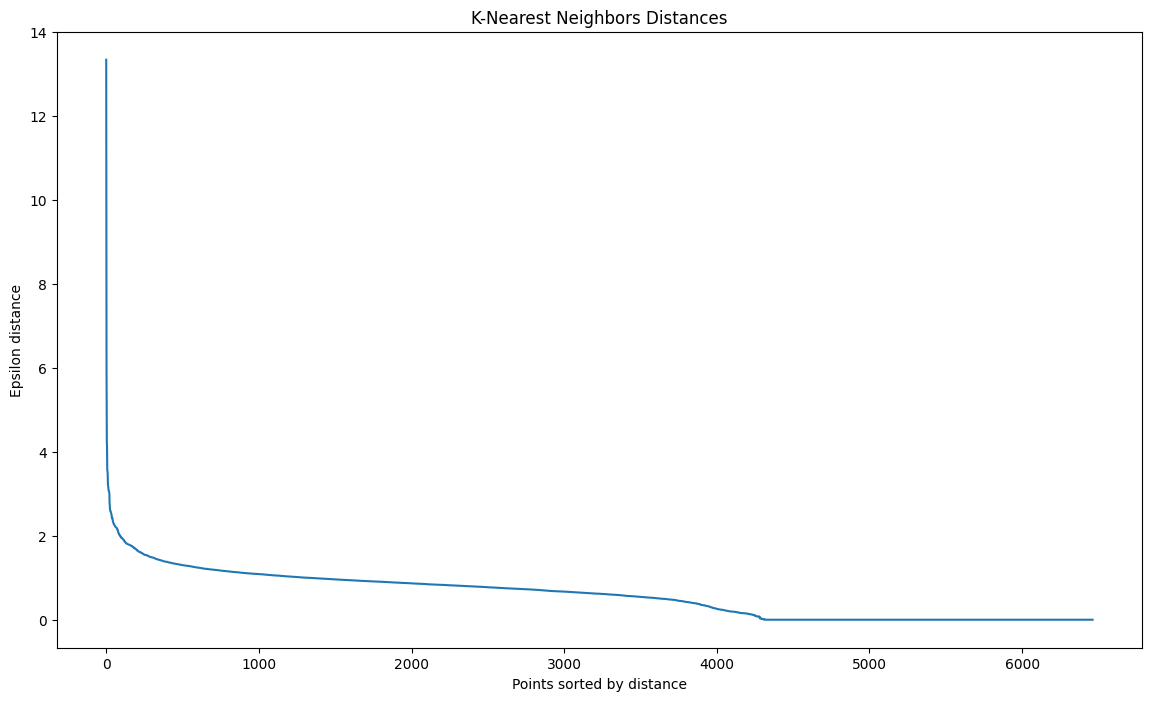

In [83]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

neighbors = NearestNeighbors(n_neighbors=48) 
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)


distances = np.sort(distances, axis=0)[::-1]
distances = distances[:,1]
plt.figure(figsize=(14, 8))  # Increase the width of the plot
plt.plot(distances)
plt.title('K-Nearest Neighbors Distances')
plt.xlabel('Points sorted by distance')
plt.ylabel('Epsilon distance')
plt.show()

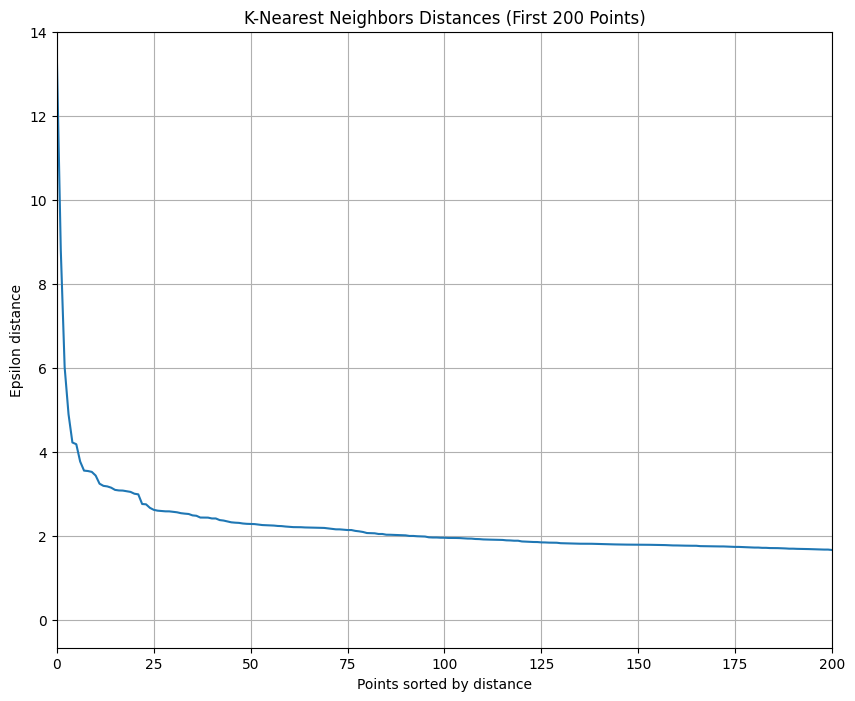

In [84]:
plt.figure(figsize=(10, 8))
plt.plot(distances)
plt.xlim(0, 200)
plt.title('K-Nearest Neighbors Distances (First 200 Points)')
plt.xlabel('Points sorted by distance')
plt.ylabel('Epsilon distance')
plt.grid(True)
plt.show()

In [86]:
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.cluster import DBSCAN

eps_values = np.arange(8, 9, 0.1)  
min_samples_values = range(2, 100, 10)  
best_score = -1

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_scaled)
        if len(set(labels)) > 1: # a check to see if there are more than one cluster, since that is nessesary for silhouette score
            score = silhouette_score(X_scaled, labels)
            if score > best_score:
                best_score = score
                best_params = {'eps': eps, 'min_samples': min_samples}

print(f"Best parameters were eps={best_params['eps']} and min_samples={best_params['min_samples']}")


Best parameters were eps=8.899999999999997 and min_samples=2


Clusters found: [-1  0]


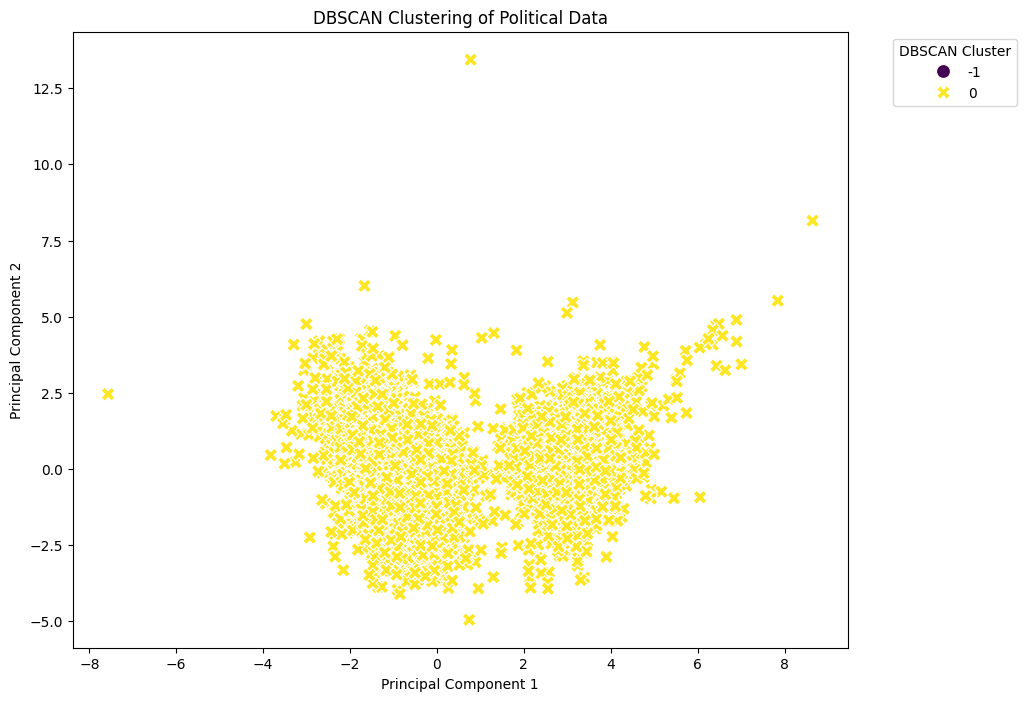

In [87]:
# The output from the silhouette score. 
dbscan = DBSCAN(eps=8.9, min_samples=2)
clusters = dbscan.fit_predict(X_scaled)

df['DBSCAN_Cluster'] = clusters

import numpy as np

print("Clusters found:", np.unique(clusters))

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA_1', y='PCA_2', hue='DBSCAN_Cluster', data=df, palette='viridis', style='DBSCAN_Cluster', s=100)
plt.title('DBSCAN Clustering of Political Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='DBSCAN Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [88]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
# Split the PCA components into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(pca_df, y, test_size=0.2, random_state=42)

# Create and train the RidgeClassifier
ridge_classifier = RidgeClassifier()
ridge_classifier.fit(X_train, y_train)

# Predict the target values for the test set
y_pred_ridge = ridge_classifier.predict(X_test)

# Evaluate the model
class_report_ridge = classification_report(y_test, y_pred_ridge)

print("\nClassification Report:\n", class_report_ridge)


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        48
           2       0.48      0.38      0.42       430
           3       0.44      0.78      0.56       540
           4       0.00      0.00      0.00       228
           5       0.00      0.00      0.00        42
           6       0.00      0.00      0.00         1

    accuracy                           0.45      1293
   macro avg       0.13      0.16      0.14      1293
weighted avg       0.34      0.45      0.38      1293



C:\Users\Jesper Kristensen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Jesper Kristensen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Jesper Kristensen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-pa

In [100]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Split the PCA components into training and testing sets
xtrain_pca, xtest_pca, ytrain, ytest = train_test_split(pca_df, y, test_size=0.2, random_state=40)

# Define models
models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf'), RidgeClassifier(), KNeighborsClassifier()]

# Train and evaluate models using PCA-transformed features
for model in models:
    model.fit(xtrain_pca, ytrain)
    print(f'{model} : ')
    print('Training Accuracy : ', accuracy_score(ytrain, model.predict(xtrain_pca)))
    print('Validation Accuracy : ', accuracy_score(ytest, model.predict(xtest_pca)))
    print()
    cm = confusion_matrix(ytest, model.predict(xtest_pca))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    #disp.plot()
    #plt.show()


    print(classification_report(ytest, model.predict(xtest_pca)))
    plt.show()


LogisticRegression() : 
Training Accuracy :  0.4595744680851064
Validation Accuracy :  0.46249033255993816

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00        48
           2       0.46      0.40      0.43       415
           3       0.46      0.74      0.57       578
           4       0.36      0.02      0.04       214
           5       0.00      0.00      0.00        31

    accuracy                           0.46      1293
   macro avg       0.22      0.19      0.17      1293
weighted avg       0.42      0.46      0.40      1293



C:\Users\Jesper Kristensen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Jesper Kristensen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Jesper Kristensen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-pa

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...) : 
Training Accuracy :  0.8087040618955512
Validation Accuracy :  0.5390564578499614

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.32      0.12     

C:\Users\Jesper Kristensen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Jesper Kristensen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Jesper Kristensen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-pa

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00        48
           2       0.50      0.46      0.48       415
           3       0.48      0.76      0.59       578
           4       1.00      0.00      0.01       214
           5       0.00      0.00      0.00        31

    accuracy                           0.49      1293
   macro avg       0.33      0.20      0.18      1293
weighted avg       0.54      0.49      0.42      1293

RidgeClassifier() : 
Training Accuracy :  0.4597678916827853
Validation Accuracy :  0.47873163186388246

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00        48
           2       0.49      0.46      0.47       415
           3       0.48      0.74      0.58       578
           4       0.00      0.00      0.00       214
           5       0.00    

C:\Users\Jesper Kristensen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Jesper Kristensen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Jesper Kristensen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-pa